In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
dfa = pd.read_csv("volumes_v4.csv")
dfb = pd.read_csv("volumes_v3_2.csv")
df = pd.read_csv("volumes_v4.csv")

In [3]:
df[np.isnan(df.volume)]

,Unnamed: 0,cow,filename,volume,lf_vol,rf_vol,lb_vol,rb_vol


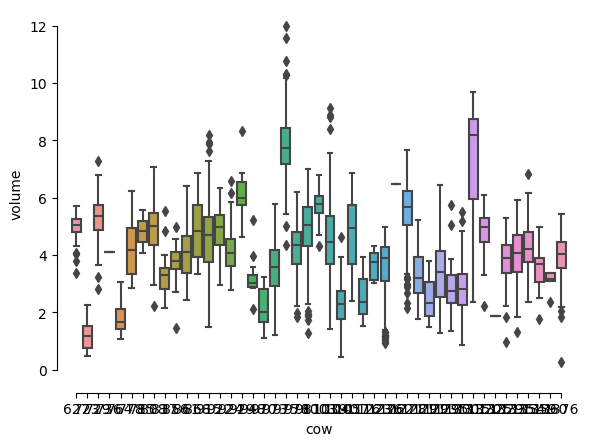

In [4]:
sns.boxplot(x="cow", y="volume",data = df)
sns.despine(offset=10, trim=True)

In [5]:
df2 = pd.melt(df, id_vars = "cow", value_vars = ["volume", "lf_vol", "rf_vol", "lb_vol", "rb_vol"]).reset_index()
grouped = df2[["cow", "variable", "value"]].groupby(["cow", "variable"]).agg([np.nanmedian, np.nanmin,np.nanmax,np.nanmean])
grouped.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in grouped.columns]
grouped = grouped.reset_index()
grouped

,cow,variable,value_nanmedian,value_nanmin,value_nanmax,value_nanmean
0,627,lb_vol,0.674849,0.380991,0.995496,0.679922
1,627,lf_vol,1.627333,1.244093,2.083724,1.627374
2,627,rb_vol,0.849123,0.374157,1.040451,0.836694
3,627,rf_vol,1.908813,1.317919,2.303497,1.909497
4,627,volume,5.047442,3.382555,5.714226,5.008983
...,...,...,...,...,...,...
220,1376,lb_vol,0.511121,0.001870,0.911576,0.507509
221,1376,lf_vol,1.709853,0.212429,2.362302,1.656140
222,1376,rb_vol,0.492266,0.000297,0.753708,0.489285
223,1376,rf_vol,1.375006,0.032951,2.046729,1.351589


In [7]:
grouped2 = pd.melt(grouped, id_vars = ["cow", "variable"], value_vars = ["value_nanmedian", "value_nanmin","value_nanmax", "value_nanmean"], var_name = "measure")

In [9]:
grouped2

,cow,variable,measure,value
0,627,lb_vol,value_nanmedian,0.674849
1,627,lf_vol,value_nanmedian,1.627333
2,627,rb_vol,value_nanmedian,0.849123
3,627,rf_vol,value_nanmedian,1.908813
4,627,volume,value_nanmedian,5.047442
...,...,...,...,...
895,1376,lb_vol,value_nanmean,0.507509
896,1376,lf_vol,value_nanmean,1.656140
897,1376,rb_vol,value_nanmean,0.489285
898,1376,rf_vol,value_nanmean,1.351589


C:\Users\marie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


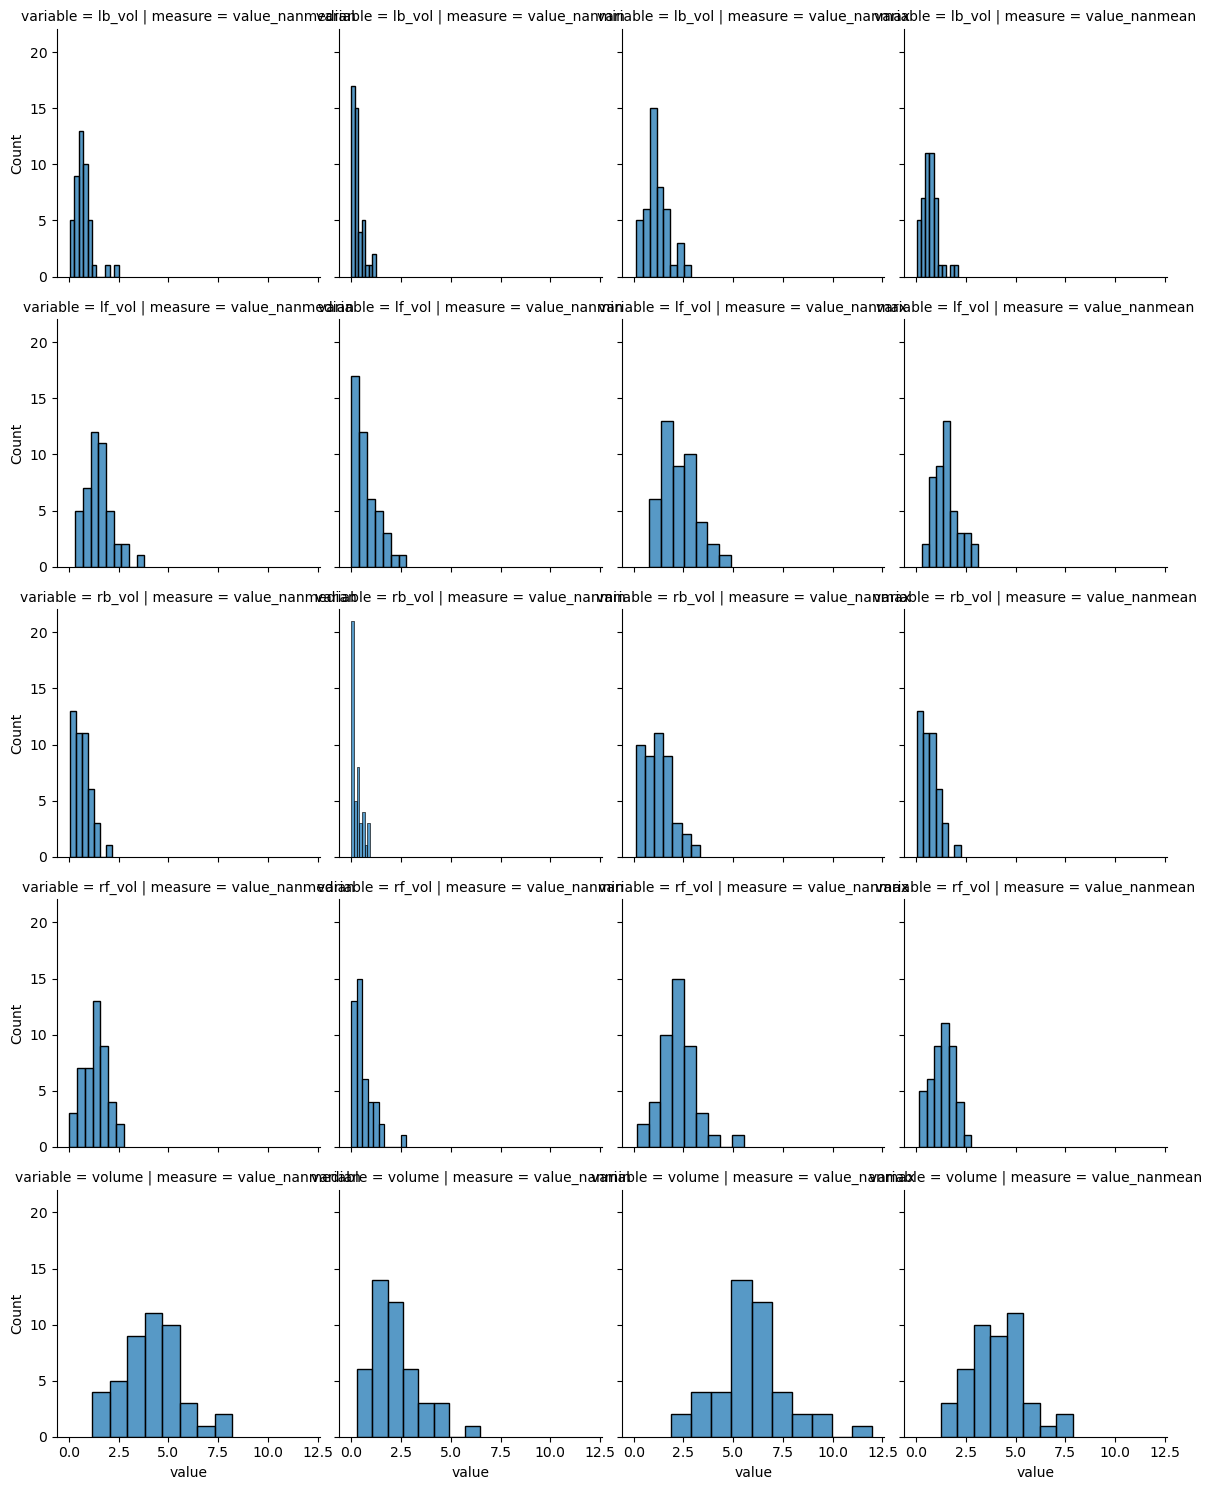

In [10]:
g = sns.FacetGrid(grouped2,row="variable", col = "measure")
g.map_dataframe(sns.histplot, x="value")
